<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Multilayer Perceptron

We can use ML models to perform image classification, 

We saw how we used single layer Perceptron to predict labels

We can use MLP, basically feedforward network

In [1]:
#PyTorch functinality
#torch.nn Neural Network functionality
#torch.optim for optimizer 
#torch.utils.data for dataset handling
#torchvision.transforms for data augmentation
#torchvision.datasets for loading dataset
#sklearn's metrics confusion matrix 
#sklearn's decomposition and manifold for visualizing neural network
#in two dimension, Matlobplot for plotting
#

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

In [2]:
#We give random seed for reproducibility results

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [3]:
#MNIST dataset and save in folder called .data

ROOT = '.data'

train_data = datasets.MNIST(root = ROOT, 
                            train = True, 
                            download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/train-images-idx3-ubyte.gz to .data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/train-labels-idx1-ubyte.gz to .data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/t10k-images-idx3-ubyte.gz to .data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/t10k-labels-idx1-ubyte.gz to .data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
#Normalize the data - why? 
#Mean Zero and SD of one 

#Allows our data by substracting mean and dividing standard deviation
#of our dataset 
#Mean and SD is calculated over training set, not test set



In [4]:
#Standard devation: How much variation from Mean exists?
#Mean is Average

mean = train_data.data.float().mean() / 255
std = train_data.data.float().std() / 255

In [5]:
mean = train_data.data.float().mean() / 255
std = train_data.data.float().std() / 255

In [6]:
print(f'Calculated mean: {mean}')
print(f'Calculated std: {std}')

Calculated mean: 0.13066047430038452
Calculated std: 0.30810779333114624


In [ ]:
# We have Mean and STD
#How do we use them? We use Torchvision transforms

#Transform states how our data is to be processed and augmented
# Data augmentation invovles manipulating available training data
#So we can artificially create more training examples

#transforms.Compose to build list of transformations to apply to image


#transforms.RandomRotation - randomly rotates image between (-x, +x)
#transforms.RandomCrop first adds padding around our image
#ToTesnor - Convert from PIL image into PyTorch tensor
#Normalize -this subtracts the mean and divides by the standard deviations given


In [7]:
#Train transform - created more examples for our model to train on
#Test transform - normalized



train_transforms = transforms.Compose([
                            transforms.RandomRotation(5, fill=(0,)),
                            transforms.RandomCrop(28, padding = 2),
                            transforms.ToTensor(),
                            transforms.Normalize(mean = [mean], std = [std])
                                      ])

test_transforms = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean = [mean], std = [std])
                                     ])

In [8]:
#Train Data and Test Data

train_data = datasets.MNIST(root = ROOT, 
                            train = True, 
                            download = True, 
                            transform = train_transforms)

test_data = datasets.MNIST(root = ROOT, 
                           train = False, 
                           download = True, 
                           transform = test_transforms)

In [9]:
#Length of Dataset
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 60000
Number of testing examples: 10000


In [10]:
#Loading Images 
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap = 'bone')
        ax.axis('off')

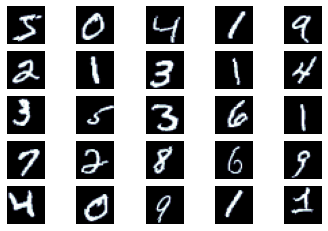

In [11]:
N_IMAGES = 25

images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]] 

plot_images(images)

In [ ]:
#MNIST comes with training and test set, not validation set

#We use validation set to check how well our model performs on unseen data

#Validation set is from 10% of data

#We don't take validation set from test set 

#In Research Papers, we use test set, and we use with same test set







In [13]:
# We define exact number of examples, 
#we want in each split of training/validation set

VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

In [15]:
#We use random_split to take a random 10% of training set to use as
#validation set
train_data, valid_data = data.random_split(train_data, 
                                           [n_train_examples, n_valid_examples])

In [16]:

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 54000
Number of validation examples: 6000
Number of testing examples: 10000


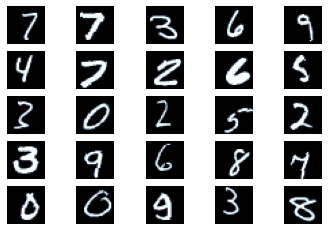

In [17]:
N_IMAGES = 25

images = [image for image, label in [valid_data[i] for i in range(N_IMAGES)]] 

plot_images(images)

In [18]:
#Validation set is subset of training set
#When we change transform of one, by default Torchvision will change
#others, we use deepcopy of validation data

valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

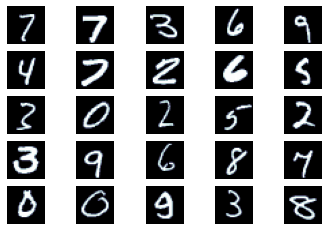

In [19]:
# We display the same image to double check if there are the same


N_IMAGES = 25

images = [image for image, label in [valid_data[i] for i in range(N_IMAGES)]] 

plot_images(images)

In [20]:
#We shuffle our training set, when it will be used for 
#Stochastic gradient descent
#Ideally, we use biggest batch size we can
#

BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data, 
                                 shuffle = True, 
                                 batch_size = BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data, 
                                 batch_size = BATCH_SIZE)

test_iterator = data.DataLoader(test_data, 
                                batch_size = BATCH_SIZE)

In [ ]:
#Neural Network, MLP with two hidden layers
#We don't use the activation function on input directly or on output
#eg. F.relu(x)

In [ ]:
#Why did we use 250 hidden deminsions and 100 elements? 

#General idea is that neural networks extract features from data 
#Layers closer to input learn to extract general features
#Later Layers combine features extracted from previous later into high level features


In [21]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
                
        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 100)
        self.output_fc = nn.Linear(100, output_dim)
        
    def forward(self, x):
        
        #x = [batch size, height, width]
        
        batch_size = x.shape[0]

        x = x.view(batch_size, -1)
        
        #x = [batch size, height * width]
        
        h_1 = F.relu(self.input_fc(x))
        
        #h_1 = [batch size, 250]

        h_2 = F.relu(self.hidden_fc(h_1))

        #h_2 = [batch size, 100]

        y_pred = self.output_fc(h_2)
        
        #y_pred = [batch size, output dim]
        
        return y_pred, h_2

In [22]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model = MLP(INPUT_DIM, OUTPUT_DIM)

In [23]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [24]:
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 222,360 trainable parameters


In [ ]:
#Training the Model 
#We define the Optimizer 


In [25]:
optimizer = optim.Adam(model.parameters())

In [26]:
criterion = nn.CrossEntropyLoss()

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [28]:
model = model.to(device)
criterion = criterion.to(device)

In [29]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [30]:
def train(model, iterator, optimizer, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
                
        y_pred, _ = model(x)
        
        loss = criterion(y_pred, y)
        
        acc = calculate_accuracy(y_pred, y)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [31]:
def evaluate(model, iterator, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [32]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [33]:
EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    
    start_time = time.monotonic()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')
    
    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 20s
	Train Loss: 0.403 | Train Acc: 87.62%
	 Val. Loss: 0.146 |  Val. Acc: 95.78%
Epoch: 02 | Epoch Time: 0m 20s
	Train Loss: 0.173 | Train Acc: 94.73%
	 Val. Loss: 0.116 |  Val. Acc: 96.51%
Epoch: 03 | Epoch Time: 0m 20s
	Train Loss: 0.138 | Train Acc: 95.74%
	 Val. Loss: 0.102 |  Val. Acc: 96.66%
Epoch: 04 | Epoch Time: 0m 20s
	Train Loss: 0.120 | Train Acc: 96.30%
	 Val. Loss: 0.084 |  Val. Acc: 97.29%
Epoch: 05 | Epoch Time: 0m 19s
	Train Loss: 0.108 | Train Acc: 96.63%
	 Val. Loss: 0.079 |  Val. Acc: 97.40%
Epoch: 06 | Epoch Time: 0m 20s
	Train Loss: 0.097 | Train Acc: 97.06%
	 Val. Loss: 0.078 |  Val. Acc: 97.62%
Epoch: 07 | Epoch Time: 0m 20s
	Train Loss: 0.093 | Train Acc: 97.11%
	 Val. Loss: 0.080 |  Val. Acc: 97.62%
Epoch: 08 | Epoch Time: 0m 20s
	Train Loss: 0.086 | Train Acc: 97.32%
	 Val. Loss: 0.075 |  Val. Acc: 97.92%
Epoch: 09 | Epoch Time: 0m 20s
	Train Loss: 0.084 | Train Acc: 97.45%
	 Val. Loss: 0.075 |  Val. Acc: 97.92%
Epoch: 10 | Epoch T

In [34]:
model.load_state_dict(torch.load('tut1-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

In [35]:
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.068 | Test Acc: 97.60%


In [ ]:
#Examine the Model

In [36]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

In [37]:
images, labels, probs = get_predictions(model, test_iterator, device)

pred_labels = torch.argmax(probs, 1)

In [39]:
def plot_confusion_matrix(labels, pred_labels):
    
    fig = plt.figure(figsize = (10, 10));
    ax = fig.add_subplot(1, 1, 1);
    cm = metrics.confusion_matrix(labels, pred_labels);
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels = range(10));
    cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)

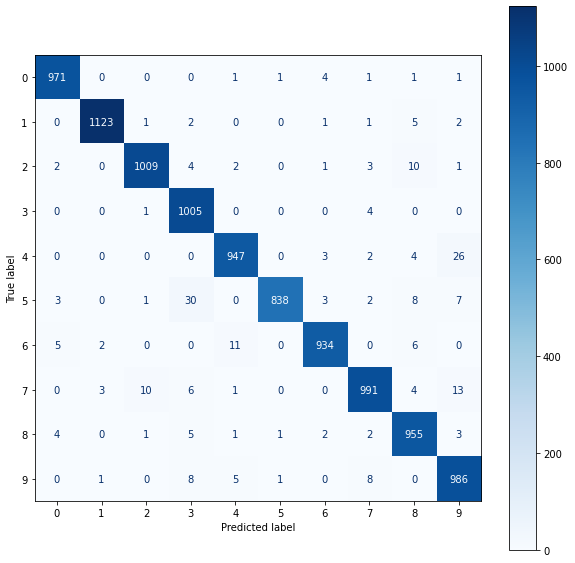

In [40]:
plot_confusion_matrix(labels, pred_labels)

In [41]:
corrects = torch.eq(labels, pred_labels)

In [42]:
incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse = True, key = lambda x: torch.max(x[2], dim = 0).values)

In [43]:
def plot_most_incorrect(incorrect, n_images):

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (20, 10))
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        image, true_label, probs = incorrect[i]
        true_prob = probs[true_label]
        incorrect_prob, incorrect_label = torch.max(probs, dim = 0)
        ax.imshow(image.view(28, 28).cpu().numpy(), cmap='bone')
        ax.set_title(f'true label: {true_label} ({true_prob:.3f})\n' \
                     f'pred label: {incorrect_label} ({incorrect_prob:.3f})')
        ax.axis('off')
    fig.subplots_adjust(hspace= 0.5)

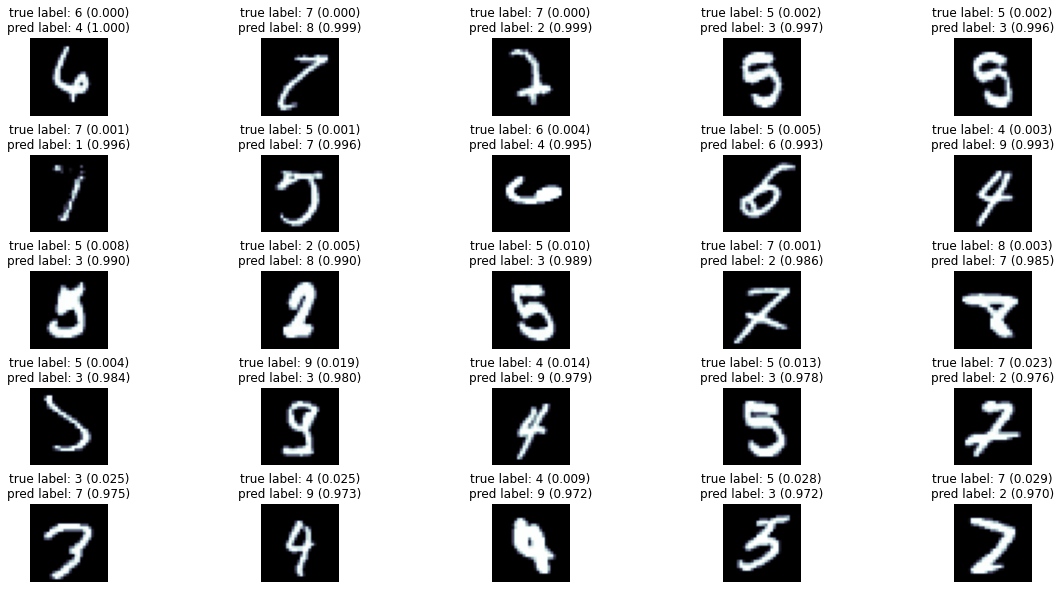

In [44]:
N_IMAGES = 25

plot_most_incorrect(incorrect_examples, N_IMAGES)